# Hospital Re-admission EDA

## Introduction
In this notebook, I will perform an exploratory data analysis on the Hospital Readmissions dataset. The dataset contains information about patients who were admitted to the hospital and whether they were readmitted within 30 days, 60 days, or not readmitted at all. The goal of this analysis is to understand the characteristics of patients who are readmitted to the hospital and to identify factors that may be associated with readmission and in particular, readmission due to diabetes.

## Data Description
The dataset contains 17 columns, and the data is stored in a CSV file. 

Link to the dataset: https://www.kaggle.com/code/raphaelmarconato/hospital-readmission-eda-and-ml-61-49/input

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# loading data from csv file

df = pd.read_csv('/home/parker/Git_hub/Hospital_Readmission_Project/data/hospital_readmissions.csv')

In [3]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
# for loop to check the count of readmissions per age group

for i in df['age'].unique():
    print(i)
    print(df[df['age'] == i]['readmitted'].value_counts())
    print('')

[70-80)
readmitted
no     3501
yes    3336
Name: count, dtype: int64

[50-60)
readmitted
no     2486
yes    1966
Name: count, dtype: int64

[60-70)
readmitted
no     3143
yes    2770
Name: count, dtype: int64

[40-50)
readmitted
no     1405
yes    1127
Name: count, dtype: int64

[80-90)
readmitted
no     2277
yes    2239
Name: count, dtype: int64

[90-100)
readmitted
no     434
yes    316
Name: count, dtype: int64



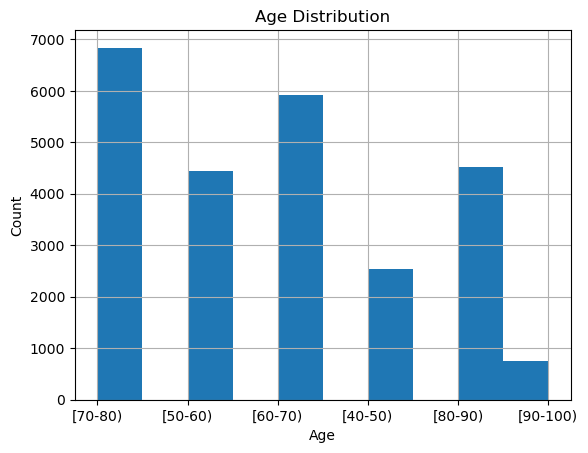

In [7]:
# histogram of counts of the age column
df['age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

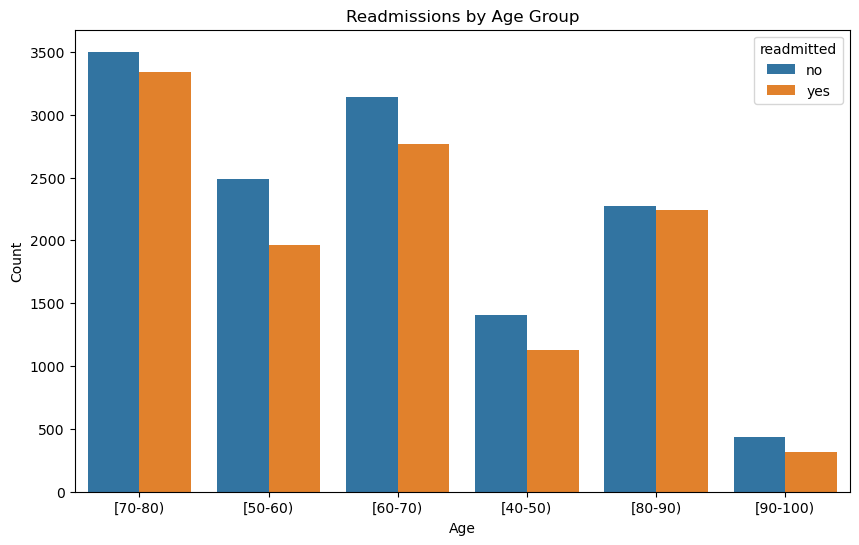

In [8]:
# histogram for by age group with the count of readmissions per age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=df)
plt.title('Readmissions by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [9]:
# making a copy of the dataframe for a quick check of the 50-60 age group

df_cpy = df.copy()

df_cpy = df_cpy[df_cpy['age'] == '[50-60)']


# value counts of the readmission status for the 50-60 age group
df_cpy['readmitted'].value_counts()

readmitted
no     2486
yes    1966
Name: count, dtype: int64

### By the looks of this the 50-60 age group has the highest number of readmissions.

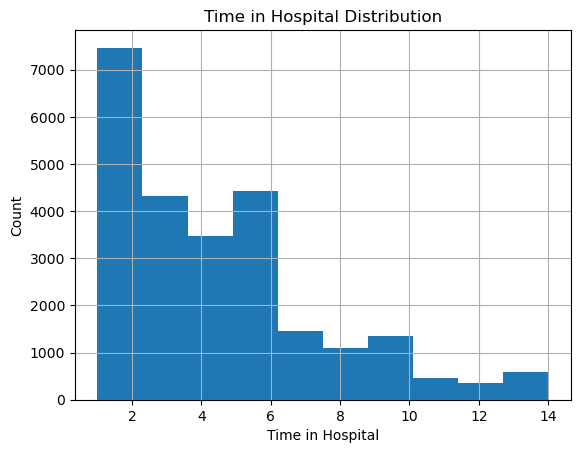

In [10]:
# histogram of the counts of time_in_hospital column
df['time_in_hospital'].hist()
plt.title('Time in Hospital Distribution')
plt.xlabel('Time in Hospital')
plt.ylabel('Count')
plt.show()

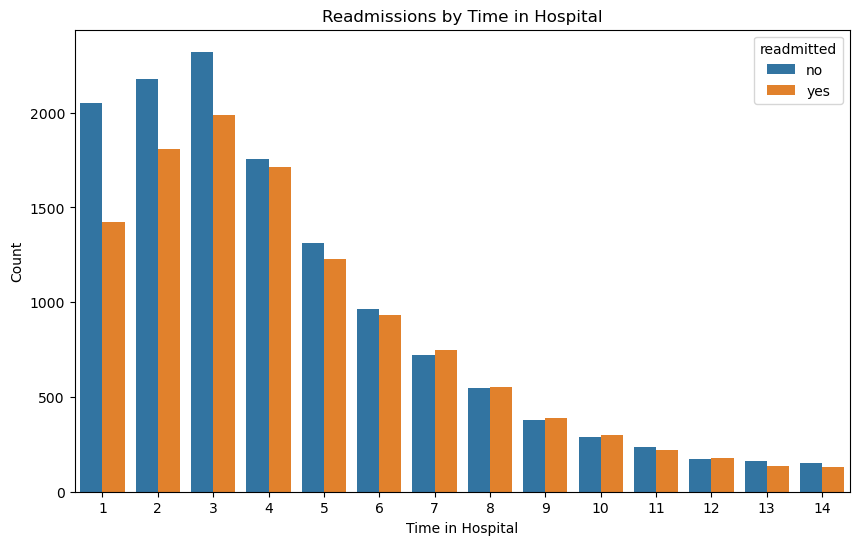

In [11]:
# histogram of the count of readmits by the time in hospital
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', hue='readmitted', data=df)
plt.title('Readmissions by Time in Hospital')
plt.xlabel('Time in Hospital')
plt.ylabel('Count')
plt.show()

In [12]:
# printing the unique values of all the columns

for col in df.columns:
    print(col)
    print(df[col].unique())
    print()

age
['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']

time_in_hospital
[ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]

n_lab_procedures
[ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]

n_procedures
[1 2 0 6 3 5 4]

n_medications
[18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]

n_outpatient
[ 2  0  1  3  7  5  4  6  9  8 11 10 15 21 13 12 27 16 14 33 20 18 23]

n_inpatient
[ 0  2  3  1  6  9  7  4  5  8 10 11 14 12 15 13]

n

In [13]:
# Changing the age values to be 1, 2, 3, 4, 5, 6

age = {
    '[70-80)' : 75,
    '[50-60)' : 55,
    '[60-70)' : 65,
    '[40-50)' : 45,
    '[80-90)' : 85,
    '[90-100)': 90
}

df['age'] = df['age'].replace(age)
df['age'].unique()

/tmp/ipykernel_877399/1016035187.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace(age)


array([75, 55, 65, 45, 85, 90])

In [14]:
med_special = {
    'Missing': 1,
    'Other' : 2,
    'InternalMedicine' : 3,
    'Family/GeneralPractice': 4,
    'Cardiology' : 5,
    'Surgery' : 6,
    'Emergency/Trauma': 7,
}

df['medical_specialty'] = df['medical_specialty'].replace(med_special)
df['medical_specialty'].unique()

/tmp/ipykernel_877399/335757096.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['medical_specialty'] = df['medical_specialty'].replace(med_special)


array([1, 2, 3, 4, 5, 6, 7])

In [15]:
diags = {
    'Respiratory' :1,
    'Other' : 2,
    'Circulatory' : 3,
    'Injury': 4,
    'Diabetes' : 5,
    'Digestive': 6,
    'Musculoskeletal' : 7,
    'Missing': 8
}

# applyting the changes to the diag_1, diag_2, diag_3 columns
df['diag_1'] = df['diag_1'].replace(diags)
df['diag_2'] = df['diag_2'].replace(diags)
df['diag_3'] = df['diag_3'].replace(diags)

print(df['diag_1'].unique())
print(df['diag_2'].unique())
print(df['diag_3'].unique())

[3 2 4 6 1 5 7 8]
[1 2 3 4 5 6 7 8]
[2 3 5 1 4 7 6 8]


/tmp/ipykernel_877399/1935764125.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diag_1'] = df['diag_1'].replace(diags)
/tmp/ipykernel_877399/1935764125.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diag_2'] = df['diag_2'].replace(diags)
/tmp/ipykernel_877399/1935764125.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('

In [16]:
gac = {
    'no' : 0,
    'normal' : 1,
    'high' : 2
}

# applying the glucose_test, A1Cresult, change columns  

df['glucose_test'] = df['glucose_test'].replace(gac)
df['A1Ctest'] = df['A1Ctest'].replace(gac)

print(df['glucose_test'].unique())
print(df['A1Ctest'].unique())


[0 1 2]
[0 1 2]


/tmp/ipykernel_877399/808462764.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['glucose_test'] = df['glucose_test'].replace(gac)
/tmp/ipykernel_877399/808462764.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Ctest'] = df['A1Ctest'].replace(gac)


In [17]:
# Applying 0 or 1 to the change, readmitted, and diabetesMed columns

crd = {
    'no' : 0,
    'yes' : 1
}

df['change'] = df['change'].replace(crd)
df['readmitted'] = df['readmitted'].replace(crd)
df['diabetes_med'] = df['diabetes_med'].replace(crd)

print(df['change'].unique())
print(df['readmitted'].unique())
print(df['diabetes_med'].unique())

[0 1]
[0 1]
[1 0]


/tmp/ipykernel_877399/3880302734.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace(crd)
/tmp/ipykernel_877399/3880302734.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace(crd)
/tmp/ipykernel_877399/3880302734.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option

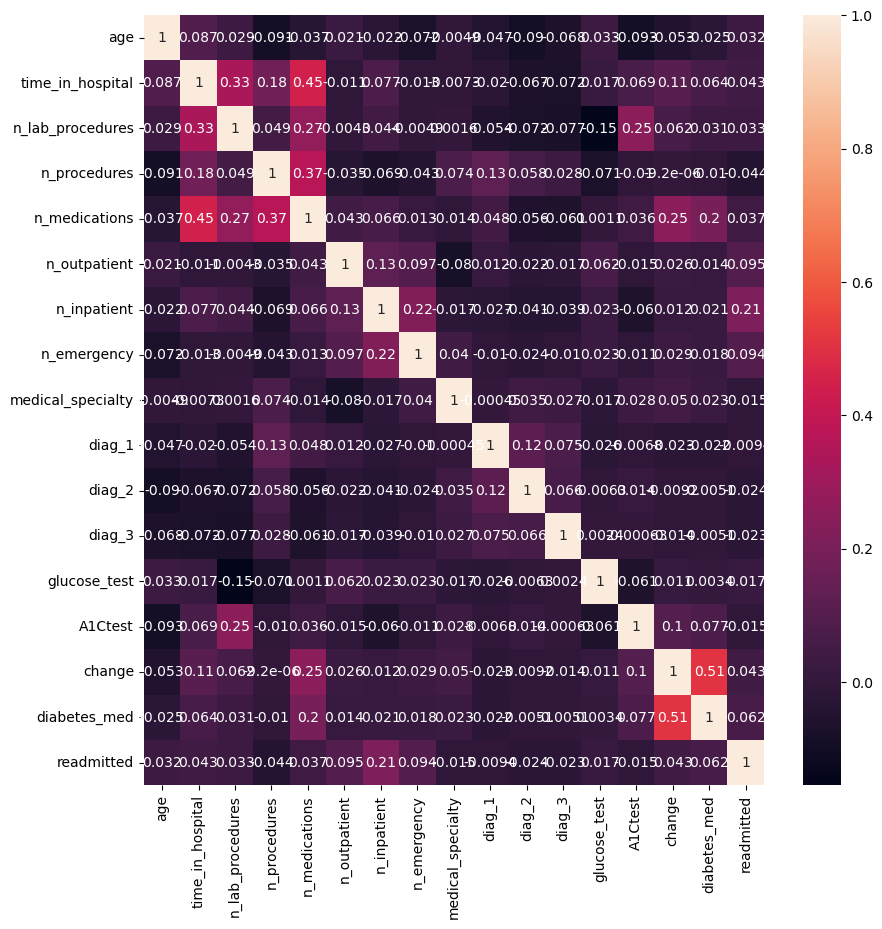

In [18]:
# Doing a correlation matrix to see the correlation between the columns, and what columns are correlated with the readmitted column

corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [19]:
# applying the same changes to the df_cpy dataframe

df_cpy['age'] = df_cpy['age'].replace(age)
df_cpy['medical_specialty'] = df_cpy['medical_specialty'].replace(med_special)
df_cpy['diag_1'] = df_cpy['diag_1'].replace(diags)
df_cpy['diag_2'] = df_cpy['diag_2'].replace(diags)
df_cpy['diag_3'] = df_cpy['diag_3'].replace(diags)
df_cpy['glucose_test'] = df_cpy['glucose_test'].replace(gac)
df_cpy['A1Ctest'] = df_cpy['A1Ctest'].replace(gac)
df_cpy['change'] = df_cpy['change'].replace(crd)
df_cpy['readmitted'] = df_cpy['readmitted'].replace(crd)
df_cpy['diabetes_med'] = df_cpy['diabetes_med'].replace(crd)


/tmp/ipykernel_877399/2481826318.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cpy['age'] = df_cpy['age'].replace(age)
/tmp/ipykernel_877399/2481826318.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cpy['medical_specialty'] = df_cpy['medical_specialty'].replace(med_special)
/tmp/ipykernel_877399/2481826318.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futu

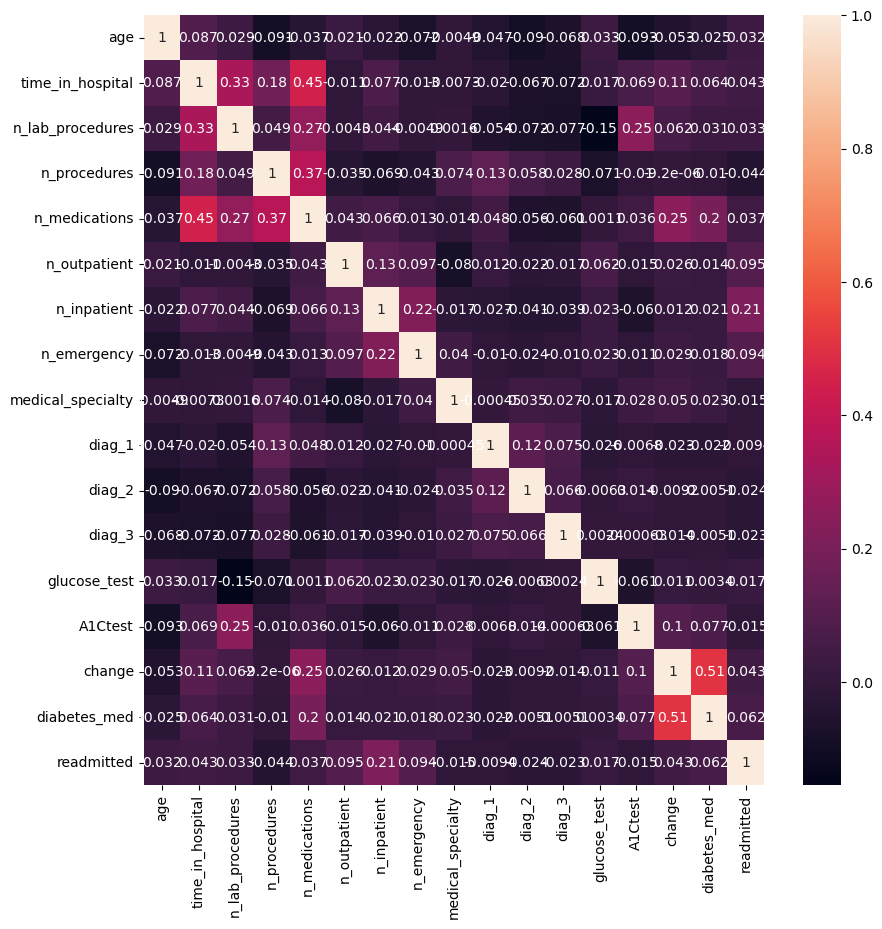

In [20]:
# running a correlation matrix on the df_cpy dataframe

corr_50_60 = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_50_60, annot=True)
plt.show()

In [21]:
# printing the columns with the highest correlation with the readmitted column
print(corr['readmitted'].sort_values(ascending=False))

readmitted           1.000000
n_inpatient          0.212480
n_outpatient         0.095487
n_emergency          0.093519
diabetes_med         0.062145
change               0.043214
time_in_hospital     0.043141
n_medications        0.036871
n_lab_procedures     0.032970
age                  0.032082
glucose_test         0.017303
diag_1              -0.009425
A1Ctest             -0.014853
medical_specialty   -0.014893
diag_3              -0.023365
diag_2              -0.023635
n_procedures        -0.044467
Name: readmitted, dtype: float64


The most correlated columns with the target variable is the number of inpatient visits.

## Feature Engineering

In [22]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,75,8,72,1,18,2,0,0,1,3,1,2,0,0,0,1,0
1,75,3,34,2,13,0,0,0,2,2,2,2,0,0,0,1,0
2,55,5,45,0,18,0,0,0,1,3,3,3,0,0,1,1,1
3,75,2,36,0,12,1,0,0,1,3,2,5,0,0,1,1,1
4,65,1,42,0,7,0,0,0,3,2,3,1,0,0,0,1,0


In [23]:
# len of stay in hospital divided by the number of lab procedures
df['tests_time_ratio'] = df['time_in_hospital'] / df['n_lab_procedures']
df['tests_time_ratio'] = df['tests_time_ratio'].round(2)

#df['tests_time_ratio'].hist()


In [24]:
# n_lab_procedures divided by the number of n_medications
df['meds_tests_ratio'] = df['n_medications'] / df['n_lab_procedures']
df['meds_tests_ratio'] = df['meds_tests_ratio'].round(2)

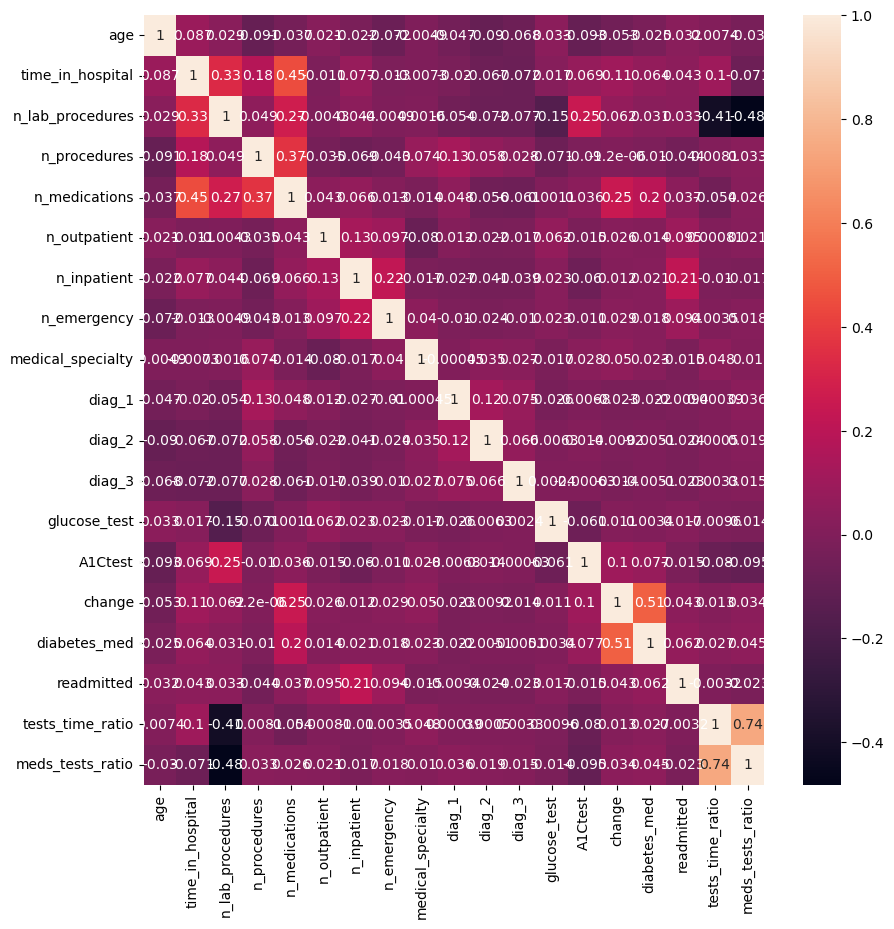

In [25]:
# new correlation matrix
corr_features = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_features, annot=True)
plt.show()


In [26]:
# printing the columns with the highest correlation with the readmitted column
print(corr_features['readmitted'].sort_values(ascending=False))

readmitted           1.000000
n_inpatient          0.212480
n_outpatient         0.095487
n_emergency          0.093519
diabetes_med         0.062145
change               0.043214
time_in_hospital     0.043141
n_medications        0.036871
n_lab_procedures     0.032970
age                  0.032082
glucose_test         0.017303
tests_time_ratio    -0.003185
diag_1              -0.009425
A1Ctest             -0.014853
medical_specialty   -0.014893
meds_tests_ratio    -0.022726
diag_3              -0.023365
diag_2              -0.023635
n_procedures        -0.044467
Name: readmitted, dtype: float64


In [27]:
# printing the columns with infinate values
print(df.columns[df.isin([np.inf]).any()])

Index([], dtype='object')


In [28]:
# running a simple XGBoost model to see the feature importance of the columns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5954


### Small Gridsearch test

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score, log_loss


# def model
xgb = XGBClassifier()

# parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds (trees)
    'max_depth': [3, 6, 9],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
    'subsample': [0.7, 1],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 1],  # Fraction of features used per tree
}

# Eval metrics
scoring = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'roc_auc': 'roc_auc',
    'log_loss': make_scorer(log_loss, greater_is_better=False)
}

# grid search 
grid_search = GridSearchCV(
    xgb, param_grid, cv=5, scoring=scoring, refit='f1', 
    n_jobs=-1, verbose=2
)

# fit the model on training data
grid_search.fit(X_train, y_train)

# print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.cv_results_['mean_test_accuracy'].max())
print("Best F1 Score:", grid_search.best_score_)  # Since we refit based on F1
print("Best Precision:", grid_search.cv_results_['mean_test_precision'].max())
print("Best Recall:", grid_search.cv_results_['mean_test_recall'].max())
print("Best ROC-AUC:", grid_search.cv_results_['mean_test_roc_auc'].max())
print("Best Log Loss:", grid_search.cv_results_['mean_test_log_loss'].min())  # Lower is better


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1; total time=   0.1s
[CV] END colsample_bytr